In [2]:
from IPython.core.debugger import set_trace

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style='seaborn')
%matplotlib inline

/tmp/ipykernel_18041/3932839874.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style='seaborn')


In [31]:
df=pd.read_csv('MSFT.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,335.350006,338.000000,329.779999,334.750000,331.642456,28865100
1,2022-01-04,334.829987,335.200012,326.119995,329.010010,325.955750,32674300
2,2022-01-05,325.859985,326.070007,315.980011,316.380005,313.442993,40054300
3,2022-01-06,313.149994,318.700012,311.489990,313.880005,310.966217,39646100
4,2022-01-07,314.149994,316.500000,310.089996,314.040009,311.124725,32720000


In [32]:
df=df[['Date','Close']]
df.head()

,Date,Close
0,2022-01-03,334.750000
1,2022-01-04,329.010010
2,2022-01-05,316.380005
3,2022-01-06,313.880005
4,2022-01-07,314.040009


In [33]:
df.index=pd.DatetimeIndex(df['Date'])
df.drop(columns='Date',inplace=True)
df.head()

,Close
Date,
2022-01-03,334.750000
2022-01-04,329.010010
2022-01-05,316.380005
2022-01-06,313.880005
2022-01-07,314.040009


In [34]:
idx = pd.date_range(min(df.index),max(df.index))
df=df.reindex(idx,fill_value=np.nan)
df.head(10)

,Close
2022-01-03,334.750000
2022-01-04,329.010010
2022-01-05,316.380005
2022-01-06,313.880005
2022-01-07,314.040009
2022-01-08,NaN
2022-01-09,NaN
2022-01-10,314.269989
2022-01-11,314.980011
2022-01-12,318.269989


In [69]:
df['Filled']= df['Close'].interpolate(option='spline')
df.head(10)

,Close,Filled
2022-01-03,334.750000,334.750000
2022-01-04,329.010010,329.010010
2022-01-05,316.380005,316.380005
2022-01-06,313.880005,313.880005
2022-01-07,314.040009,314.040009
2022-01-08,NaN,314.116669
2022-01-09,NaN,314.193329
2022-01-10,314.269989,314.269989
2022-01-11,314.980011,314.980011
2022-01-12,318.269989,318.269989


In [70]:
df.describe()

,Close,Filled
count,251.000000,362.000000
mean,268.917091,268.671837
std,25.761774,25.264369
min,214.250000,214.250000
25%,247.180001,247.145001
50%,265.899994,266.051666
75%,289.744995,288.497498
max,334.750000,334.750000


# d

In [71]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df.Close.dropna())
print(f'ADF statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF statistic: -2.571422294693125
p-value: 0.09904870445551744


In [72]:
from statsmodels.graphics.tsaplots import plot_acf

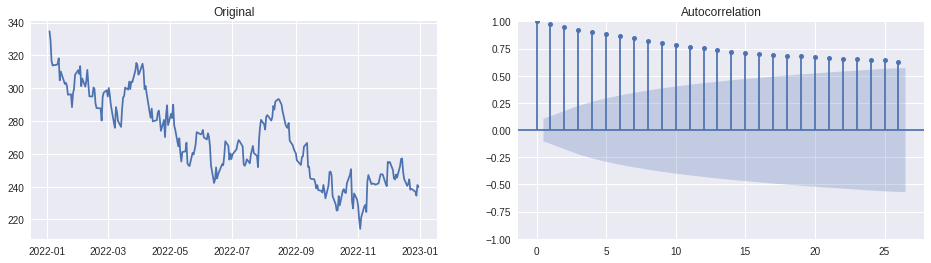

In [73]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(16,4))

ax1.plot(df.Filled)
ax1.set_title('Original')
plot_acf(df.Filled,ax=ax2);

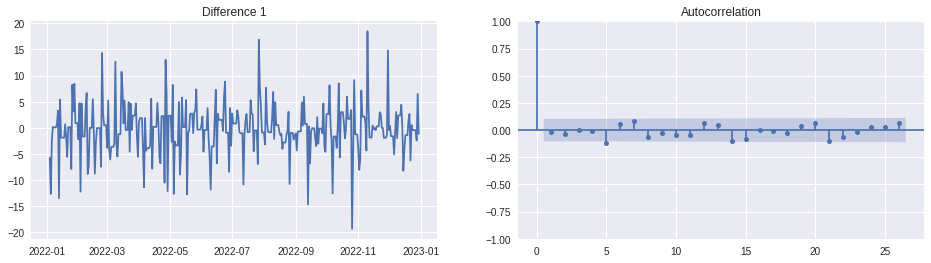

In [74]:
diff=df.Filled.diff().dropna()

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Difference 1')
plot_acf(diff,ax=ax2);

In [75]:
from pmdarima.arima.utils import ndiffs

In [76]:
ndiffs(df.Filled, test='adf')

0

# p

In [77]:
from statsmodels.graphics.tsaplots import plot_pacf

/home/aditya/anaconda3/envs/TimeSeries/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


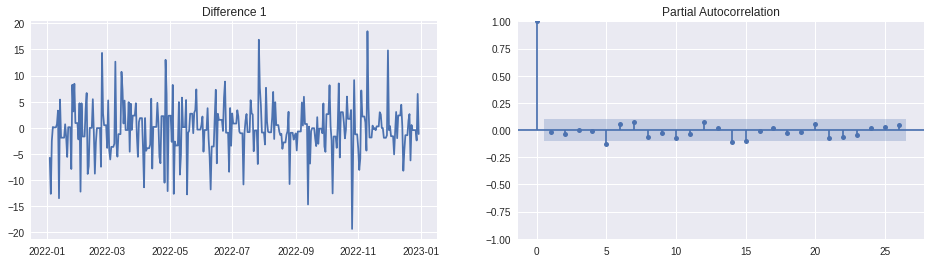

In [78]:
diff=df.Filled.diff().dropna()

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Difference 1')
plot_pacf(diff,ax=ax2);

# q

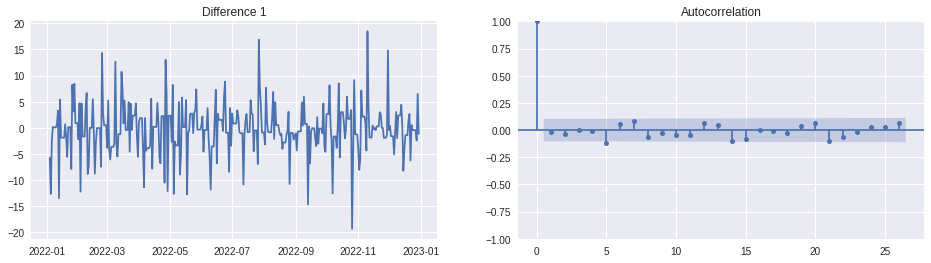

In [79]:
diff=df.Filled.diff().dropna()

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Difference 1')
plot_acf(diff,ax=ax2);

# ARIMA

In [86]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(df.Filled, order=(5,1,5))
result=model.fit()

/home/aditya/anaconda3/envs/TimeSeries/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [87]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                 Filled   No. Observations:                  362
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -1057.703
Date:                Sat, 07 Jan 2023   AIC                           2137.407
Time:                        15:51:37   BIC                           2180.184
Sample:                    01-03-2022   HQIC                          2154.414
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3548      0.252     -1.408      0.159      -0.849       0.139
ar.L2         -0.6653      0.311     -2.140      0.032      -1.275      -0.056
ar.L3          0.3143      0.436      0.721      0.4

(array([2.82066394e-02, 7.83517761e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.83517761e-05]),
 array([-17.81774989,  17.4390251 ,  52.69580009,  87.95257508,
        123.20935007, 158.46612506, 193.72290004, 228.97967503,
        264.23645002, 299.49322501, 334.75      ]),
 <BarContainer object of 10 artists>)

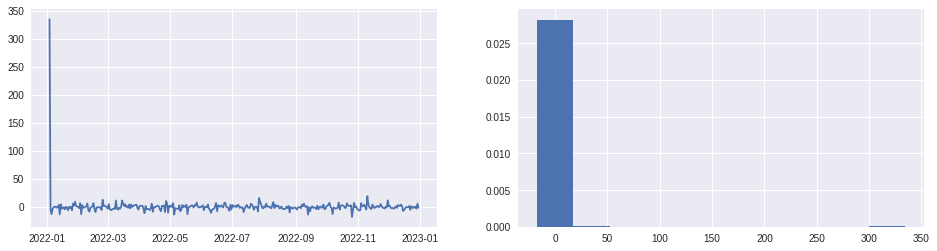

In [88]:
residuals=pd.DataFrame(result.resid)

fig, (ax1, ax2)=plt.subplots(1,2,figsize=(16,4))

ax1.plot(residuals)
ax2.hist(residuals, density=True)

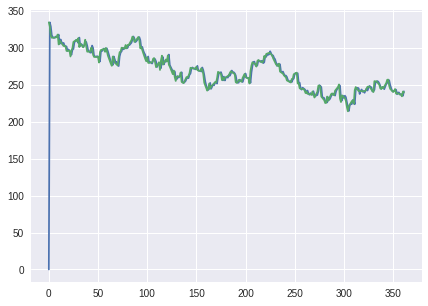

In [91]:
predictions=result.predict()
plt.figure(figsize=(7,5))
plt.plot(range(len(predictions)),predictions)
plt.plot(range(df.Filled.shape[0]),df.Filled)